In [3]:
import os
import sys
sys.path.insert(0, os.path.abspath('../..'))

from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import model_from_json
from sklearn.metrics import confusion_matrix

from src.data.load_data_set import load_data_set
from src.utils.load_config import load_config

In [20]:
config = load_config("../../config/1.0-TID-RPS-ISO-m2.yml")
config

{'image_size': 50,
 'model_name': 'TID-RPS-ISO-m2',
 'epochs': 1000,
 'enable_tensorboard': True,
 'enable_earlystopping': False,
 'data_raw_path': 'data/raw',
 'data_interim_path': 'data/interim',
 'data_processed_path': 'data/processed',
 'data_labels': {0: 'TID', 1: 'RPS', 2: 'ISO'},
 'data_files': [{'file': 'A.t.m1.dir.tar.gz',
   'data_set_type': 'categorical',
   'label_start': 0},
  {'file': 'A.t.m2.dir.tar.gz',
   'data_set_type': 'categorical',
   'label_start': 0},
  {'file': 'A.r.m1.dir.tar.gz',
   'data_set_type': 'categorical',
   'label_start': 1},
  {'file': 'A.r.m2.dir.tar.gz',
   'data_set_type': 'categorical',
   'label_start': 1},
  {'file': 'A.i.m1.dir.tar.gz',
   'data_set_type': 'categorical',
   'label_start': 2}],
 'data_train_split': 0.8,
 'data_validation_split': 0.8,
 'data_batch_size': 32,
 'data_num_classes': 3,
 'model_directory': 'models',
 'log_dir': 'logs/fit'}

In [21]:
def load_model(model_name: str, model_directory: Path):
    model_file = model_directory/f"{model_name}.json"
    model_weights = model_directory/f"{model_name}.h5"
    
    with open(model_file) as json_file:
        loaded_model = model_from_json(json_file.read())
    
    # load weights into new model
    loaded_model.load_weights(str(model_weights))

    return loaded_model

In [22]:
model = load_model(config['model_name'], Path("../../models"))

In [23]:
data_processed_path = Path(config.get('data_processed_path', 'data/processed')) / config['model_name']
data_processed_path_2 = Path(config.get('data_processed_path', 'data/processed')) / 'TID-RPS-ISO-m1'



test_data_set = load_data_set(config, Path("../..")/data_processed_path/'test')
test_data_set_2 = load_data_set(config, Path("../..")/data_processed_path_2/'test')

In [45]:
print(sorted([item.name for item in (Path('../..')/data_processed_path_2/'test').glob('*')]))
print([item.name for item in (Path('../..')/data_processed_path/'test').glob('*')])

['ISO', 'RPS', 'TID']
['ISO', 'RPS', 'TID']


In [27]:
predict = []
correct = []

for image, label in test_data_set.take(100):
    predictions = model.predict(image)

    for i in range(predictions.shape[0]):
        predict.append(np.argmax(predictions[i]))
        correct.append(np.argmax(label[i]))
        print(predictions[i], label[i])

46] tf.Tensor([0. 1. 0.], shape=(3,), dtype=float32)
[1.0000000e+00 6.6172101e-10 1.9744933e-10] tf.Tensor([0. 0. 1.], shape=(3,), dtype=float32)
[0.0019602  0.30097237 0.69706744] tf.Tensor([1. 0. 0.], shape=(3,), dtype=float32)
[0.96134686 0.01166952 0.02698358] tf.Tensor([0. 0. 1.], shape=(3,), dtype=float32)
[0.02421947 0.25240508 0.7233755 ] tf.Tensor([1. 0. 0.], shape=(3,), dtype=float32)
[0.9175277  0.07504042 0.00743191] tf.Tensor([0. 0. 1.], shape=(3,), dtype=float32)
[0.9761812  0.00352879 0.02028999] tf.Tensor([0. 0. 1.], shape=(3,), dtype=float32)
[0.8740056  0.10451535 0.02147896] tf.Tensor([0. 0. 1.], shape=(3,), dtype=float32)
[9.9812692e-01 7.5765088e-04 1.1153258e-03] tf.Tensor([0. 0. 1.], shape=(3,), dtype=float32)
[0.9897321  0.00775013 0.00251776] tf.Tensor([0. 0. 1.], shape=(3,), dtype=float32)
[9.9997902e-01 7.9022311e-06 1.3163033e-05] tf.Tensor([0. 0. 1.], shape=(3,), dtype=float32)
[8.1350381e-04 9.7686726e-01 2.2319248e-02] tf.Tensor([0. 1. 0.], shape=(3,), dt

KeyboardInterrupt: 

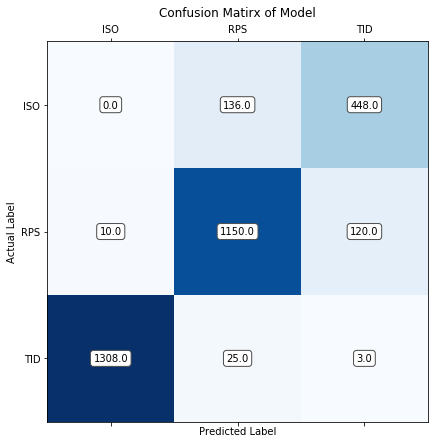

In [26]:
conf_mtrx = confusion_matrix(correct, predict)
labels = ['TID', 'RPS', 'ISO']

fig, ax = plt.subplots(figsize=(7, 7))

# Using matshow here just because it sets the ticks up nicely. imshow is faster.
ax.matshow(conf_mtrx, cmap="Blues")

for (i, j), z in np.ndenumerate(conf_mtrx):
    ax.text(
        j,i, 
        '{:0.1f}'.format(z),
        ha='center',
        va='center',
        bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))

ax.set_xticklabels(['']+labels)
ax.set_yticklabels(['']+labels)
ax.set_xlabel("Predicted Label")
ax.set_ylabel("Actual Label")


plt.title("Confusion Matirx of Model")

plt.show()